In [1]:
from collections import Counter
from itertools import product

import matplotlib as mpl  # noqa: F401
import pandas as pd

<Axes: >

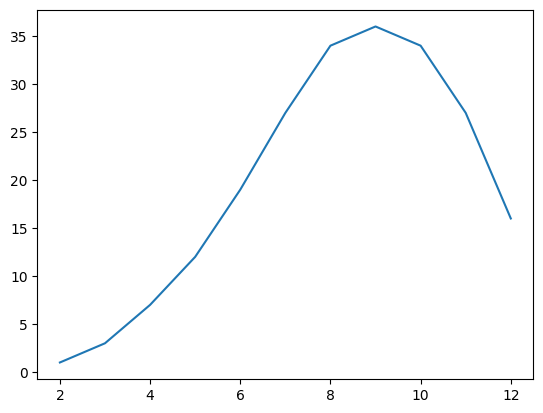

In [2]:
def get_stats(add=0, drop=None):
    stats = Counter()
    d6 = range(1, 1 + 6)
    for r1, r2, r3 in product(d6, repeat=3):

        if drop is None:
            r_drop = r3
        elif drop == "low":
            r_drop = min(r1, r2, r3)
        elif drop == "high":
            r_drop = max(r1, r2, r3)
        else:
            raise ValueError

        roll = r1 + r2 + r3 - r_drop + add
        stats[roll] += 1
    return stats


pd.Series(get_stats(0, "low")).plot()

In [3]:
def get_stats(add=0, drop=None):
    success = partial = fail = 0
    d6 = range(1, 1 + 6)
    for r1, r2, r3 in product(d6, repeat=3):

        if drop is None:
            r_drop = r3
        elif drop == "low":
            r_drop = min(r1, r2, r3)
        elif drop == "high":
            r_drop = max(r1, r2, r3)
        else:
            raise ValueError

        roll = r1 + r2 + r3 - r_drop + add
        if roll >= 10:
            success += 1
        elif roll >= 7:
            partial += 1
        else:
            fail += 1
    total = success + partial + fail
    return fail / total, partial / total, success / total

In [4]:
print("regular")
for add in range(-3, 3 + 1):
    fail, partial, success = get_stats(add)
    print(f"{add=:+}, {fail=:3.0%}, {partial=:3.0%}, {success=:3.0%}")

print("\nadv")
for add in range(-3, 3 + 1):
    fail, partial, success = get_stats(add, "low")
    print(f"{add=:+}, {fail=:3.0%}, {partial=:3.0%}, {success=:3.0%}")

print("\ndis")
for add in range(-3, 3 + 1):
    fail, partial, success = get_stats(add, "high")
    print(f"{add=:+}, {fail=:3.0%}, {partial=:3.0%}, {success=:3.0%}")

regular
add=-3, fail=83%, partial=17%, success= 0%
add=-2, fail=72%, partial=25%, success= 3%
add=-1, fail=58%, partial=33%, success= 8%
add=+0, fail=42%, partial=42%, success=17%
add=+1, fail=28%, partial=44%, success=28%
add=+2, fail=17%, partial=42%, success=42%
add=+3, fail= 8%, partial=33%, success=58%

adv
add=-3, fail=64%, partial=36%, success= 0%
add=-2, fail=48%, partial=45%, success= 7%
add=-1, fail=32%, partial=48%, success=20%
add=+0, fail=19%, partial=45%, success=36%
add=+1, fail=11%, partial=37%, success=52%
add=+2, fail= 5%, partial=27%, success=68%
add=+3, fail= 2%, partial=18%, success=81%

dis
add=-3, fail=95%, partial= 5%, success= 0%
add=-2, fail=89%, partial=10%, success= 0%
add=-1, fail=81%, partial=18%, success= 2%
add=+0, fail=68%, partial=27%, success= 5%
add=+1, fail=52%, partial=37%, success=11%
add=+2, fail=36%, partial=45%, success=19%
add=+3, fail=20%, partial=48%, success=32%


In [5]:
def get_stats_barbarian(add=0):
    stats = Counter()
    stats_c = Counter()
    d6 = range(1, 1 + 6)
    d8 = range(1, 1 + 8)
    for r1, r2 in product(d6, d8):
        roll = r1 + r2 + add
        complications = r1 > r2
        if complications:
            stats_c[roll] += 1
        else:
            stats[roll] += 1
    return stats, stats_c


get_stats_barbarian(add=1)

(Counter({9: 4,
          10: 4,
          11: 4,
          7: 3,
          8: 3,
          12: 3,
          13: 3,
          5: 2,
          6: 2,
          14: 2,
          3: 1,
          4: 1,
          15: 1}),
 Counter({8: 3, 6: 2, 7: 2, 9: 2, 10: 2, 4: 1, 5: 1, 11: 1, 12: 1}))